# $\color{red}{\text{Compression d’un Signal Audio}}$

#### Réalisé par : Zahra BENSLIMANE & Tarek BENAISSA

## Travail préparatoire :
- Soit x[n] un signal audio (réel) discret échantillonné à la fréquence d’échantillonnage Fs. Afin
de le compresser, x est segmenté en trames fenêtrées de Nwin échantillons. Le pas d’avancement
temporel des fenêtres est noté Nhop. Le débit de compression est noté D (en bits/s).
1. Soit Ntr le nombre (fractionnaire) de trames dans 1s du signal x. Donner le nombre de bits
maximal Nbmax pouvant être alloué à chaque trame en fonction de D et Ntr
$$Nb_{max} = \frac {D} {Ntr}$$
-

## Partie pratique :

In [23]:
# import des librairies utilisées 

import numpy as np
from scipy.io import wavfile as wav
import matplotlib.pyplot as plt
from math import *
from IPython.display import display, Audio
import wave
import scipy.io
import cmath
from tqdm import tqdm

In [24]:
''' 
la fonction TFCT du TP2
'''
#implémentation de la fonction TFCT 
def tfct(nWin,nHop,audio,Nfft):
    #chargement du signal depuis son chemin
    A = (2**15-1)
    fe,xVect = wav.read(audio)
    xVect = xVect/A
    
    #nombre de trames L
    L = int((len(xVect) - abs(nWin - nHop))//nHop)

    #nombre minimal de points fréquentiels utiles M
    M  = Nfft
    
    #Matrice renvoyé par la fonction
    xMat = np.zeros((M, L),dtype=complex)    
    
    #rempilssage de matrice
    for i in range(L):
        #extraction des trames fenetres
        xVectTrame = xVect[i*nHop: i*nHop + nWin] *np.hamming(nWin)
        #calcul de TF pour chaque trame
        FT = np.fft.fft(xVectTrame,Nfft)
        #remplissage de TF en colonne
        xMat[:, i] = FT 
           
    #calcul des vecteurs fréquentiels et temporels
    t = np.linspace(0, len(xVect)/fe, len(xVect))
    f = np.linspace(0, fe, Nfft)
    return xMat,t,f      
        

In [25]:
'''
1-2-3

'''
def itfct(X,nWin,nHop,fs):
    
    [nfft,L] = np.shape(X)
    
    #Préallocation de mémoire pour le signal reconstruit y
    Yinit=np.zeros((L,nWin))
    
    #Reconstruction de chaque trame à partir de sa TFD
    for i in range(L):
        Yinit[i,:]=np.real(np.fft.ifft(X[:,i],n=nWin))
    #Decalage des trames
    LenX = int(nHop*L + abs(nWin - nHop)) 
    Ydec=np.zeros((LenX,L))
    for i in range(L):
        Ydec[i*nHop:i*nHop+nWin,i]=Yinit[i,:]
    #Reconstruction du signal
    Y = np.zeros(LenX)
    Y = Ydec.sum(axis=1)
    #Normalisation
    k=np.sum(np.hamming(nWin)/nHop)
    Y/=k
    
    t = np.linspace(0, LenX/fs, LenX)
    
    return t,Y
    


In [26]:
# fonction pour tracer le spectrogramme
def spectro(xMat,t,f,fe,title):
    xMat2 = np.zeros(np.shape(xMat))
    for i in range(len(xMat[0])):
        for j in range(len(xMat[:, 0])):
            if xMat[j, i] != 0:
                xMat2[j, i] = 20*np.log10(xMat[j, i])
            else:
                xMat2[j, i] = np.NaN
    plt.figure(figsize=((15,5)))
    plt.imshow(xMat2, aspect='auto',extent =[0,t[-1],0,f[-1]]
               ,interpolation='none', origin='lower',cmap='jet')
    plt.xlabel('temps (s)')
    plt.ylabel("frequence (Hz)")
    plt.ylim(0,fe/2)
    plt.title(title)
    plt.colorbar()
    plt.show()
    




### Compression et codage audio perceptif :

44100

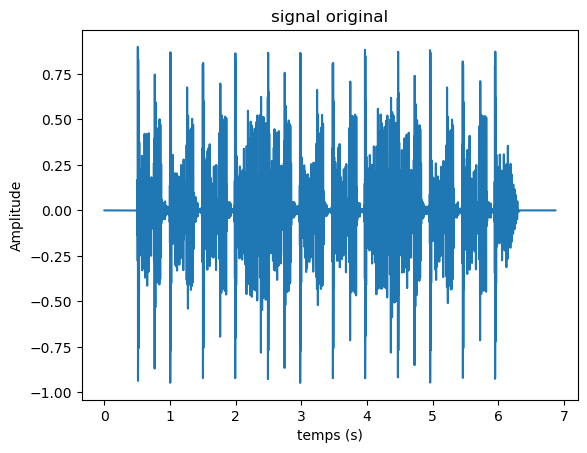

frequence d echantillonnage : Fe = 44100 Hz


In [27]:
'''
1. affichage du signal original

'''

path='sounds/daftPunk_aroundTheWorld.wav'
#path='daftPunk_aroundTheWorld.wav'

fe,xVect = wav.read(path)
display(Audio("sounds/daftPunk_aroundTheWorld.wav"),fe)
A = (2**15-1)

t = np.linspace(0, len(xVect)/fe, len(xVect))

plt.figure()
plt.plot(t , xVect/A )
plt.xlabel('temps (s)')
plt.ylabel("Amplitude")
plt.title("signal original")
# plt.xlim(0.5,4)
plt.show()
print(f'frequence d echantillonnage : Fe = {fe} Hz')



## Question 1 :

27.533157485244043


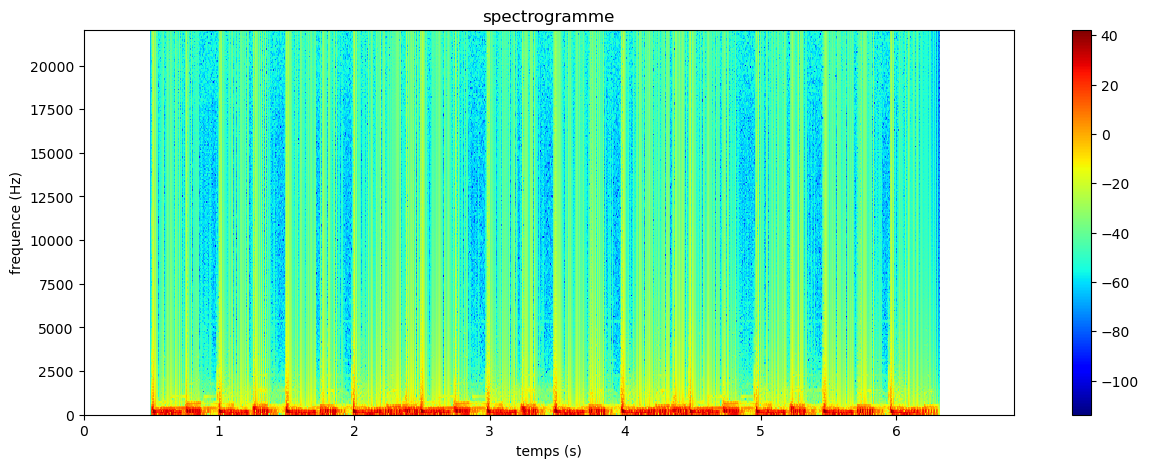

In [28]:
#Calcul de la TFCT du signal audio


# choix judicieu, de la taillee de la feenetre 2^10 et nfft = nwin et nhop c la moitié
nWin=512
nHop=int(nWin/2)
Nfft=nWin
Nwin = nWin
Nhop = nHop
xMat,t,f=tfct(nWin,nHop,path,Nfft)
#print(xMat)
xMat_amp = np.abs(xMat)
#print(xMat_amp)
#print(max(xMat_amp.any()))
print(max(xMat_amp[:,100]))
spectro(np.abs(xMat),t,f,fe,'spectrogramme')  

'''
tracé du spectrogramme 
'''

spectro(xMat,t,f,fe,'spectrogramme du daft punk')

## Question 2 :

C:\Users\zahra\AppData\Local\Temp\ipykernel_15244\3928402861.py:14: ComplexWarning: Casting complex values to real discards the imaginary part
  xNormalise[:, i] = xMat[:, i]
C:\Users\zahra\AppData\Local\Temp\ipykernel_15244\3928402861.py:11: ComplexWarning: Casting complex values to real discards the imaginary part
  An[i] = max(xMat[:, i]) # facteur de gain
C:\Users\zahra\AppData\Local\Temp\ipykernel_15244\3928402861.py:12: ComplexWarning: Casting complex values to real discards the imaginary part
  xNormalise[:, i] = xMat[:, i]/ An[i]


1.0


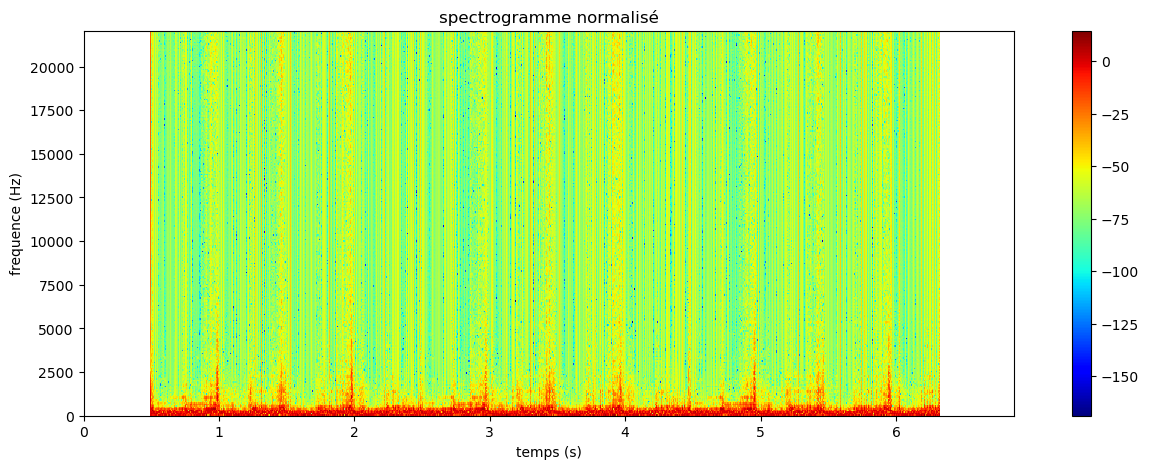

In [29]:
'''
2. Calcul de gain et normalisation du signal

'''
# nouvelle tfct normalisé entre 0 et 1
xNormalise = np.zeros(np.shape(xMat))
# enregistrement des gain utilisé pour la normalisation pour la reconstruction
An = np.zeros(xMat.shape[1])
for i in range(len(xMat[0, :])):
    if max(xMat[:, i]) != 0 :
        An[i] = max(xMat[:, i]) # facteur de gain
        xNormalise[:, i] = xMat[:, i]/ An[i]
    else :
        xNormalise[:, i] = xMat[:, i]
        


print(max(xNormalise[:,390]))
spectro(np.abs(xNormalise),t,f,fe,'spectrogramme normalisé')  
# matrice qui va conttenir le module du spectre normalisé, car cc'est ça qu'on va stocker
# pour la reconstruction il suffit d'utiliser les phases du spectre original
Xnorm_amp = np.abs(xNormalise)

#print(An) 
#print(xNormalise)
#print(Xnorm_amp)


## Question 3 :

In [30]:
Fe = fe
debit = 392000 
#debit = 784000
#debit = 128000
channels = 1
L = np.floor((Fe + 1 - Nwin)/Nhop + 1)
K1 = np.floor((Nwin-1)/Nhop)
K2 = np.floor(Fe/Nhop - L)
# le nombre fractionnaire de trame correspond au nombre de trames complète auquel on ajoute les
# les trames des bords, i.e : les trames qui commencent avent le debut de x1 et finisssent dans x1
# et les trames qui commencent dans x1 et qui finissent en dehors de x1
Ntr = L + (Nwin-1)* K1/Nwin - Nhop*K1*(K1+1)/(2*Nwin) + (Fe-L*Nhop)*(K2+1)/Nwin - Nhop*K2*(K2+1)/(2*Nwin)
# nbr_bits_trame : c'est le nombre de bits utilisé pour coder 1 seconde du signal divisé par le nombre de trames
nbr_bits_trame = np.floor(debit/ Ntr) 
# nbr_bits_Nfft : dans chaque trame on Nfft point dee la TFD a codé, donc le nombre de bit par point
# correspond au nombre de bits par trame divisé par le nombre de point frequentiel Nfft
nbr_bits_Nfft = np.floor(nbr_bits_trame/Nfft)

print( 'nbr_bits_trame = ',nbr_bits_trame)
print( 'nbr_bits_Nfft = ',nbr_bits_Nfft)

nbr_bits_trame =  2275.0
nbr_bits_Nfft =  4.0


## Question 4 :

In [31]:
# ne marche pas
"""
def allocation(x_norm,Nbit_trame):
    Q=np.zeros(x_norm.shape)
    Max_bits=16
    # pour chaque trame 
    for l in tqdm(range(x_norm.shape[1])):
        # NMR = SMR - SNR  en dB
        # NMR = SMR - (-96)  en dB
        # au debut o pas alloué de bit donc 
        
        NMR= 20*np.log10(x_norm[:,l]) + 96
        R = Nbit_trame
        index=[i for i in range(len(NMR))]
        # tant que le nombre de bit a distribué restant est supérieur à 0 et qu'il ya des NMR positif
        # on continue l'allocation et on s'arrete si on atteint 16 bit car il ne y'aura plus de probleme
        while (R>0 and (NMR>0).any()) and len(index)>0:
            
            #max_NMR = NMR[index[0]]
            #max_pos = index[0]
            #for k in index:
                #if NMR[k] >= max_NMR:
                   # max_NMR = NMR[k]
                    #max_pos = k
                 
            max_pos = np.argmax(NMR) 
            max_NMR = NMR[max_pos]
            
            # Allocation d'un bit si on a pas atteint 16 bits
            if Q[max_pos,l] <= Max_bits :
                Q[max_pos,l]+=1
                # une augmentation de 6dB du SNR donc une diminution du NMR
                NMR[max_pos]-=6
                # on decremente notre resevoir de bits
                R-=1
            
                #if Q[max_pos,l]== Max_bits:
                    #index.pop(index.index(max_pos)) #
    return Q

"""


"\ndef allocation(x_norm,Nbit_trame):\n    Q=np.zeros(x_norm.shape)\n    Max_bits=16\n    # pour chaque trame \n    for l in tqdm(range(x_norm.shape[1])):\n        # NMR = SMR - SNR  en dB\n        # NMR = SMR - (-96)  en dB\n        # au debut o pas alloué de bit donc \n        \n        NMR= 20*np.log10(x_norm[:,l]) + 96\n        R = Nbit_trame\n        index=[i for i in range(len(NMR))]\n        # tant que le nombre de bit a distribué restant est supérieur à 0 et qu'il ya des NMR positif\n        # on continue l'allocation et on s'arrete si on atteint 16 bit car il ne y'aura plus de probleme\n        while (R>0 and (NMR>0).any()) and len(index)>0:\n            \n            #max_NMR = NMR[index[0]]\n            #max_pos = index[0]\n            #for k in index:\n                #if NMR[k] >= max_NMR:\n                   # max_NMR = NMR[k]\n                    #max_pos = k\n                 \n            max_pos = np.argmax(NMR) \n            max_NMR = NMR[max_pos]\n            \n    

In [32]:

def allocation(x_norm,Nbit_trame):
    Q=np.zeros(x_norm.shape)
    Max_bits=16
    # pour chaque trame 
    for l in tqdm(range(x_norm.shape[1])):
        # NMR = SMR - SNR  en dB
        # NMR = SMR - (-96)  en dB
        # au debut o pas alloué de bit donc 
        
        NMR= 20*np.log10(x_norm[:,l]) + 96
        R = Nbit_trame
        index=[i for i in range(len(NMR))]
        # tant que le nombre de bit a distribué restant est supérieur à 0 et qu'il ya des NMR positif
        # on continue l'allocation et on s'arrete si on atteint 16 bit car il ne y'aura plus de probleme
        while (R>0 and (NMR>0).any()) and len(index)>0:
            
            #max_NMR = NMR[index[0]]
            #max_pos = index[0]
            #for k in index:
                #if NMR[k] >= max_NMR:
                    #max_NMR = NMR[k]
                    #max_pos = k
                   
            max_pos = np.argmax(NMR) 
            max_NMR = NMR[max_pos]
            
            # Allocation d'un bit
            Q[max_pos,l]+=1
            # une augmentation de 6dB du SNR donc une diminution du NMR
            NMR[max_pos]-=6
            # on decremente notre resevoir de bits
            R-=1
            
            # si on attein 16 on le prend plus en considération
            if Q[max_pos,l]== Max_bits:
                index.pop(index.index(max_pos)) #
    return Q





In [33]:
print(nbr_bits_trame)

q = allocation(Xnorm_amp,nbr_bits_trame)

2275.0


  0%|          | 0/1182 [00:00<?, ?it/s]C:\Users\zahra\AppData\Local\Temp\ipykernel_15244\2350197366.py:10: RuntimeWarning: divide by zero encountered in log10
  NMR= 20*np.log10(x_norm[:,l]) + 96
100%|██████████| 1182/1182 [00:24<00:00, 48.67it/s]


(512, 1182)
4.0


Text(0.5, 1.0, "histogramme montrant les nombre de bits, et le nombre  d'echantillon codé sur ce dernier ")

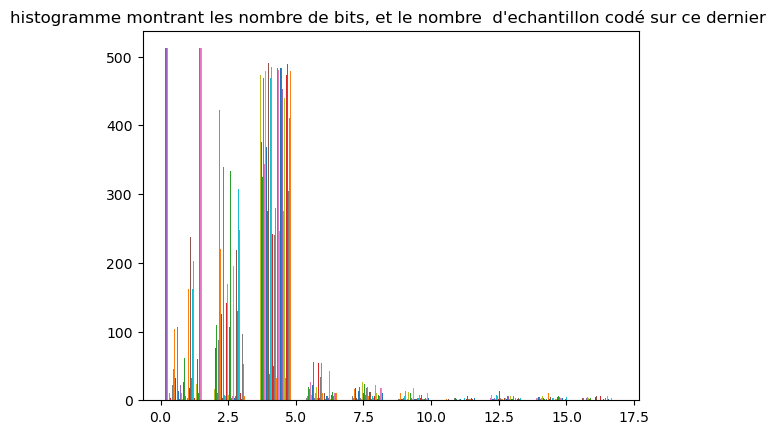

In [34]:
print(q.shape)
print(q[200,1000])
# il faut ajouter les bins pour que ça soit plus clair
plt.hist(q);
plt.title("histogramme montrant les nombre de bits, et le nombre  d'echantillon codé sur ce dernier ")

## Question 5 :

- tant que le nombre de bit a distribué restant est supérieur à 0 et qu'il ya des NMR positif on continue l'allocation et on s'arrete si on atteint 16 bit car il ne y'aura plus de probleme
- s'il ne reste plus de bit alloué on arrete
- si les NMR sont tous negatif on arrete, car ça sert à rien d'ajouter des bits car ça ne ferait aucune différence et on utilise plus de memoire pour rien


## Question 6 :

In [35]:
# fonction QuantCod


def Fuquant(x, N):
# quantificateur uniforme sur n bits
# saturation  +-1
# entrée: vecteur de reels
# sortie: vecteur d'entiers positifs

    if N>0:
        pown = 2**(N-1)
        #print(pown)
        xq = pown*(x<0) + np.floor( pown *np.min([np.abs(x),1-1e-10]) )
        #print(pown*(x<0),"+", np.floor( pown *np.min([np.abs(x),1-1e-10]) ))
    else:
        # xq = []
        xq = 0
    return xq



 ### Tracer la caractéristique y = QuantCod(x) de cette fonction et décrire son fonctionnement.

 - cette fonction reçoit en entrée un signal normalisé entre -1 et 1 et, elle quantifie en utilisant le nombre de bit alloué pour ça, et puis renvoi son codage

 - par exemple pour #print(Fuquant(0.2, 8))--> la fonction renvoi 25, cette valeur correspond au codage de la valeur quantifié resultante de 0.2 , pour la retrouver on calcul : 25/(2**(8-1))*1 = 25/128 = 0.1953125. --> ceci est la valeur quantifié 

 - pour les valeurs negatives, elle ont un codage supérieur de 128 à 256

In [36]:
# Tracer la caractéristique y = QuantCod(x) de cette fonction et décrire son 
#fonctionnement.

# cette fonction reçoit en entrée un signal normalisé entre -1 et 1 et, elle quantifie en
# utilisant le nombre de bit alloué pour ça, et puis renvoi son codage

# par exemple pour #print(Fuquant(0.2, 8))--> la fonction renvoi 25, cette valeur correspond
# au codage de la valeur quantifié resultante de 0.2 , pour la retrouver on calcul :
# 25/(2**(8-1))*1 = 25/128 = 0.1953125. --> ceci est la valeur quantifié 

# pour les valeurs negatives, elle ont un codage supérieur de 128 à 256



#print(Xq_norm[0:10,100])
#print(Xnorm_amp[0:10,100])

#plt.figure()
#plt.plot(Xq_norm[:,100])
#plt.plot(Xnorm_amp[:,100])

#print(Fuquant(0.2, 8))

(15,)
les valeurs de x :  [0.1 0.2 0.3 0.4 0.5 0.6 0.7]
les valeurs de xq :  [0.09375   0.1953125 0.296875  0.3984375 0.4921875 0.59375   0.6953125]
les code des valeur de x :  [12. 25. 38. 51. 63. 76. 89.]


Text(0, 0.5, 'sa quantification sur 8 bits')

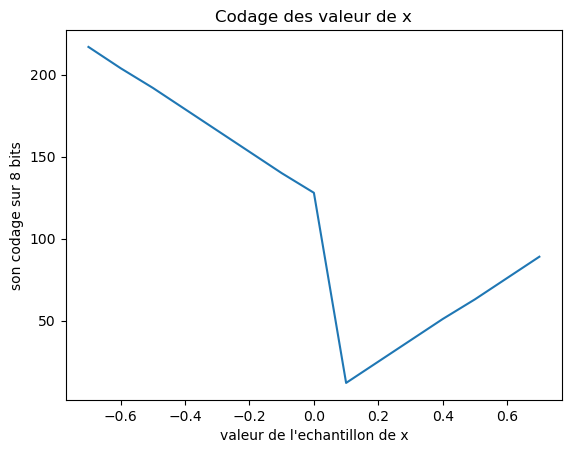

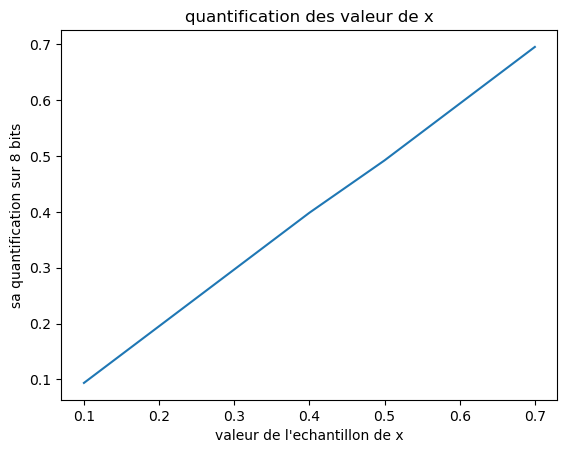

In [37]:
x = np.arange(-0.7, 0.8,0.1)
print(x.shape)
Xq_c=np.zeros(x.shape)
for i in range(x.shape[0]):
        Xq_c[i] = Fuquant(x[i], 8)
        
        
print("les valeurs de x : ", x[8:15])       
print("les valeurs de xq : ", Xq_c[8:15]/128) 
print("les code des valeur de x : ",Xq_c[8:15])



plt.figure()
plt.plot(x,Xq_c)
plt.title("Codage des valeur de x" )
plt.xlabel("valeur de l'echantillon de x")
plt.ylabel("son codage sur 8 bits")



plt.figure()
plt.plot(x[8:15],Xq_c[8:15]/128)
plt.title("quantification des valeur de x" )
plt.xlabel("valeur de l'echantillon de x")
plt.ylabel("sa quantification sur 8 bits")

## Question 7 :
calcul du signal Xq_norm -->  quantification du signal Xnorm_amp en utilisant le nombre de bits alloué pour chaque point ( disponible dans la matrice q)

In [38]:
Xq_norm=np.zeros(Xnorm_amp.shape)
for i in range(Xnorm_amp.shape[0]):
    for j in range(Xnorm_amp.shape[1]):
        Xq_norm[i,j] = Fuquant(Xnorm_amp[i,j], q[i,j])


        
        

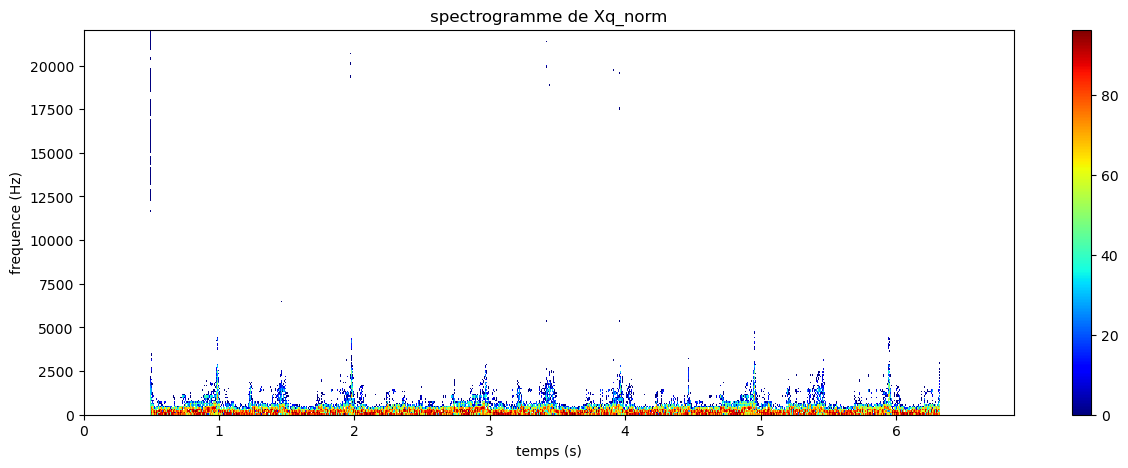

In [39]:

# le probleme c'est que Xq_norm c'est le codage du spectre et non les valeurs elle meme

# ici on calcul le spectrogramme mais avec les code -> bizarre il faut decoder d'abord
spectro(Xq_norm,t,f,fe,'spectrogramme de Xq_norm') 

# Decodage et décompression :

## Question 8 :

In [40]:
#############################
#   MIDTREAD_DEQUANTIZER    #
#############################


def Fuquant_inv(xq,R):
    if R==0:
        return 0
    else :
        yq=np.round(xq)
        sign=-2*(yq//(2**(R-1)))+1
        Q=2/(2**R-1)
        x=yq%(2**(R-1))
        return sign*Q*x

(15,)
on a bien une droite, car la fonction Fuquant_inv decode les valeurs codés par Fuquant et donne la valeur de x


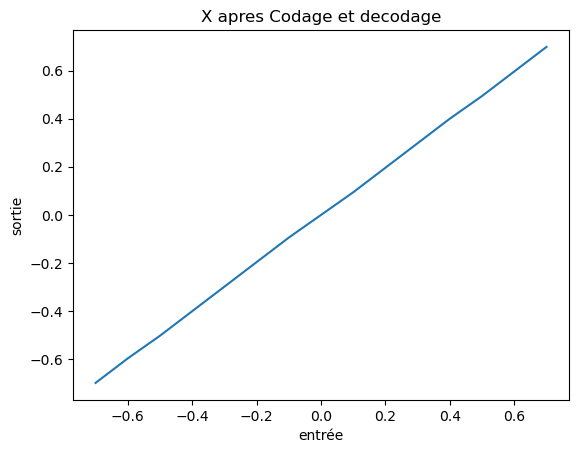

In [41]:
# fonction Cod_inv

x = np.arange(-0.7, 0.8,0.1)
print(x.shape)
Xq_c=np.zeros(x.shape)
for i in range(x.shape[0]):
    Xq_c[i] = Fuquant(x[i], 8)
        
Xq_c_inv =  np.zeros(x.shape)
for i in range(x.shape[0]):
    Xq_c_inv[i] = Fuquant_inv(Xq_c[i],8)
        


plt.figure()
plt.plot(x,Xq_c_inv)
plt.title("X apres Codage et decodage" )
plt.xlabel("entrée")
plt.ylabel("sortie")

print("on a bien une droite, car la fonction Fuquant_inv decode les valeurs codés par Fuquant et donne la valeur de x")

## Question 9 :

In [42]:
Xuq=np.zeros(Xq_norm.shape)
for i in range(Xuq.shape[0]):
    for j in range(Xuq.shape[1]):
        #on decode en utilisant le nombre de bit prevu lors de l'allocation et multiplie 
        # par le gain dans chaque trames pour avoir les valeurs originales
        Xuq[i,j]=Fuquant_inv(Xq_norm[i,j], q[i,j])*An[j]
        
        

## Question 10 :

In [43]:
#print(Xuq)
# TFCT inverse en utilisant les phases obtenues à partir de la TFCT originale avant compresssion
tf, yr=itfct(Xuq*np.exp(1j*np.angle(xMat)), Nwin,Nhop,Fe)

MemoryError: Unable to allocate 2.67 GiB for an array with shape (302848, 1182) and data type float64

In [ ]:
# affichage du signal original

path='sounds/daftPunk_aroundTheWorld.wav'
#path='daftPunk_aroundTheWorld.wav'
fe,xVect = wav.read(path)
A = (2**15-1)
t = np.linspace(0, len(xVect)/fe, len(xVect))
plt.figure()
plt.plot(t , xVect/A )
plt.plot(tf , yr, c = "orange" )
plt.xlabel('temps (s)')
plt.ylabel("Amplitude")
plt.title("signal original")
# plt.xlim(0.5,4)
plt.show()
print(f'frequence d echantillonnage : Fe = {fe} Hz')


"""
# tracé du signal reconstruit
plt.figure()
plt.plot(tf , yr, c = "orange" )
plt.xlabel('temps (s)')
plt.ylabel("Amplitude")
plt.title("signal reconstruit")
plt.show()
print(f'frequence d echantillonnage : Fe = {fe} Hz')

"""

In [ ]:
data=np.array(yr*(2**(16-1)))
wav.write("outputSounds/compression.wav", Fe ,data.astype(np.int8))

In [ ]:
#display(Audio("compression.wav"),Fe)
# Ecoute du signal
display(Audio(data,rate= Fe))

## Question 12 :
à partir de D = 128 kbit/s, on a pratiquement le même son en sortie, mais on a unee sorte de bruit.

## Question 13 :
- l'intêret d'utiliser l'allocation percepttive au lieu d'une allocations uniforme est qu'elle nous permet de reduire l'espace de stockaage neccesssaire pour coder le ficchier audio, en ne codant pas les son qui vont être inaudible du au effets de masquage, donc on supprime de l'information qui ne sert pratiquement à. rien et on garde que le néccessaire.
- On peut améliorer ça en utilisant en plus de ça un codage de Hauffman qui va utiliser moins de bits pour les valeurs qui apparaissent le plus dans le signal, ainsi on pourra réduire encore l'espace nécessaire pour le stockage du fichier audio 

## Conclusion :

- on a vu l'effet du masquage percepif en pratique et son effet sur les fréquences voisinantes.
- on a pu faire une allocation de memoire selon le besoin, pour garder l'autenticité du fichier audio et pour réduire l'espace de stockage, dans le cas de ce morceau, on pu diviser l'espace par 2.

- la compression grâce au codage perceptifs nous permet de faire reduire l'esspacce néccessaiire pour le stockage d'un fichier audio et ceci permet de ttransmetttre le son d'une façon plus simple et moins lourde et avec une bande de fréquence plus étroite, chose qui est intéressante surtout dans les plateforme de streaming audio.